<a href="https://colab.research.google.com/github/blanca-32/Biocomputacional/blob/main/Minibyc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ===============================
# INSTALACIÓN DE LIBRERÍAS
# ===============================
!pip install biopython==1.83 requests pandas matplotlib ete3
!apt-get update -qq
!apt-get install -y -qq muscle fasttree


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 63.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 70.1 MB/s eta 0:00:00
  Created wheel for ete3: filename=ete3-3.1.3-py3-none-any.whl size=2273786 sha256=412333fa732e9da02440a0bcb84d99b1dc1b9afba0a22d958164331941a4577b
  Stored in directory: /root/.cache/pip/wheels/4f/18/8d/3800b8b1dc7a8c1954eaa48424f639b2cfc760922cc3cee479
Successfully built ete3
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package muscle.
(Reading database ... 121229 files and directories currently installed.)
Preparing to unpack .../muscle_1%3a3.8.1551-2build1_amd64.deb ...
Unpacking muscle (1:3.8.1551-2build1) ...
Selecting previously unselected package fasttree.
Preparing to unpack .../fasttree_2.1.11-2_amd64.deb ...


In [4]:
from Bio import Entrez, SeqIO

# Configura tu correo
Entrez.email = "bscerinzap@eafit.edu.co"

# Buscar el gen HOXA1 en Homo sapiens, solo registros tipo mRNA
search_handle = Entrez.esearch(db="nucleotide", term="HOXA1[Gene] AND Homo sapiens[Organism] AND mRNA", retmax=5)
search_results = Entrez.read(search_handle)
search_handle.close()

# Mostrar IDs encontrados
print("IDs encontrados:", search_results["IdList"])

# Usar el primer resultado que sea una secuencia mRNA definida
record_id = None
for _id in search_results["IdList"]:
    fetch_handle = Entrez.efetch(db="nucleotide", id=_id, rettype="fasta", retmode="text")
    # Use SeqIO.parse to handle potentially multiple records or find a valid one
    records = list(SeqIO.parse(fetch_handle, "fasta"))
    fetch_handle.close()
    if records and records[0].seq:
        record = records[0]
        record_id = _id
        break

if record_id:
    # Mostrar información básica
    print(f"\nInformación para el ID: {record.id}")
    print(f"Descripción: {record.description}")
    print(f"Longitud: {len(record.seq)}")
    print(f"Secuencia (200 bases):\n{record.seq[:200]}")
else:
    print("\nNo se encontró una secuencia mRNA definida para HOXA1 en Homo sapiens en los primeros resultados.")

IDs encontrados: ['2194973865', '568815591', '2302520070', '1746322655', '1677502187']

Información para el ID: NC_060931.1
Descripción: NC_060931.1 Homo sapiens isolate CHM13 chromosome 7, alternate assembly T2T-CHM13v2.0
Longitud: 160567428
Secuencia (200 bases):
CCTAACCCTAACCCTAACCCCTAACCCTAACCCTAATCCCCTAACCCTCCTAACCCCTAACCCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC


In [5]:
for feature in record.features:
    if feature.type == "gene" or feature.type == "CDS":
        print(f"\nTipo: {feature.type}")
        print(f"Ubicación: {feature.location}")
        print(f"Detalles: {feature.qualifiers}")

In [6]:
# Extraer información funcional del gen
cds_features = [f for f in record.features if f.type == "CDS"]
if cds_features:
    protein_id = cds_features[0].qualifiers.get("protein_id", ["Desconocido"])[0]
    product = cds_features[0].qualifiers.get("product", ["Sin descripción"])[0]
    print(f"\nID de proteína: {protein_id}")
    print(f"Producto: {product}")

In [7]:
# Enlace a AlphaFold si tienes el ID UniProt
uniprot_id = "P31267"  # Ejemplo para HOXA1
print(f"Visualiza la estructura 3D en AlphaFold: https://alphafold.ebi.ac.uk/entry/{uniprot_id}")

Visualiza la estructura 3D en AlphaFold: https://alphafold.ebi.ac.uk/entry/P31267


In [8]:
# Definir la secuencia como una cadena
secuencia = (
    "ATGGATTTGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCG"
    "AGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCG"
    "AGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCG"
)

# Abrir el archivo y escribir en formato FASTA
with open("hoxa1_sequences.fasta", "w") as f:
    f.write(">Human_HOXA1\n")
    f.write(secuencia + "\n")

In [23]:
from Bio import SeqIO

# Crear archivo FASTA con secuencias de HOXA1 de distintas especies
with open("hoxa1_multi.fasta", "w") as f:
    f.write(">Human_HOXA1\nATGGATTTGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAG\n")
    f.write(">Mouse_HOXA1\nATGGATTTGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAA\n")
    f.write(">Cow_HOXA1\nATGGATTTGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAC\n")
    f.write(">Fly_labial\nATGACGTTGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAT\n")
    f.write(">Elephant_HOXA1\nATGGATTTGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGGA\n")
    f.write(">Frog_HOXA1\nATGGATTTGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGTT\n")
    f.write(">Python_HOXA1\nATGGATTTGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGCT\n")
    f.write(">Penguin_HOXA1\nATGGATTTGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGCA\n")
    f.write(">Shark_HOXA1\nATGGATTTGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGGT\n")

In [25]:
from Bio.Align.Applications import ClustalOmegaCommandline

# Descargar Clustal Omega si no está disponible
!apt-get install clustalo

# Ejecutar alineamiento
clustalomega_cline = ClustalOmegaCommandline(infile="hoxa1_multi.fasta", outfile="hoxa1_aligned.fasta", verbose=True, auto=True, force=True)
clustalomega_cline()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
clustalo is already the newest version (1.2.4-7).
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


('Using 2 threads\nRead 9 sequences (type: DNA) from hoxa1_multi.fasta\nnot more sequences (9) than cluster-size (100), turn off mBed\nSetting options automatically based on input sequence characteristics (might overwrite some of your options).\nAuto settings: Enabling mBed.\nAuto settings: Setting iteration to 1.\nUsing 8 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 9 sequences)\nCalculating pairwise ktuple-distances...\nKtuple-distance calculation progress: 0 % (0 out of 44)\nKtuple-distance calculation progress: 2 % (1 out of 44)\nKtuple-distance calculation progress: 18 % (8 out of 44)\nKtuple-distance calculation progress: 31 % (14 out of 44)\nKtuple-distance calculation progress: 38 % (17 out of 44)\nKtuple-distance calculation progress: 40 % (18 out of 44)\nKtuple-distance calculation progress: 56 % (25 out of 44)\nKtuple-distance calculation progress: 70 % (31 out of 44)\nKtuple-distance calculation progress done. CPU time: 0.00u 0.00s 0

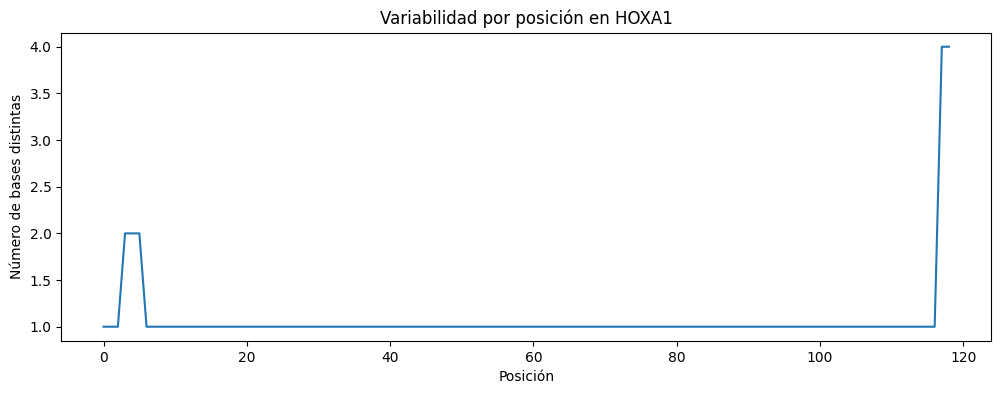

In [28]:
# Calcular variabilidad por posición
variabilidad = []
for i in range(alignment.get_alignment_length()):
    columna = alignment[:, i]
    unique_bases = set(columna)
    variabilidad.append(len(unique_bases))

# Mostrar posiciones más variables
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(variabilidad)
plt.title("Variabilidad por posición en HOXA1")
plt.xlabel("Posición")
plt.ylabel("Número de bases distintas")
plt.show()

### Visualizar el Árbol Filogenético como Imagen
Visualize the phylogenetic tree as an image for better interpretation of evolutionary relationships.

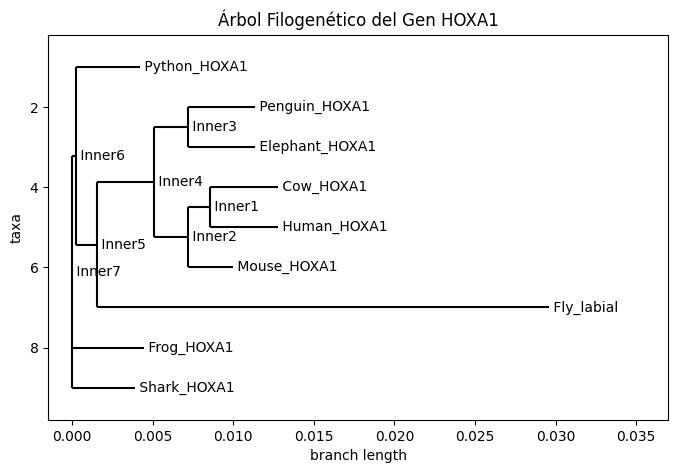

In [26]:
from Bio import AlignIO, Phylo
from Bio.Align import MultipleSeqAlignment
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
import matplotlib.pyplot as plt

# Leer archivo FASTA (assuming hoxa1_multi.fasta was used for alignment)
alignment = AlignIO.read("hoxa1_aligned.fasta", "fasta")

# Calcular matriz de distancias
calculator = DistanceCalculator("identity")
dm = calculator.get_distance(alignment)

# Construir árbol con método Neighbor Joining
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

# Dibujar árbol como imagen
fig = plt.figure(figsize=(8, 5))
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, do_show=False, axes=axes)
plt.title("Árbol Filogenético del Gen HOXA1")
plt.show()

### Visualizar el Alineamiento
You can visualize the multiple sequence alignment to see the conserved and variable regions across the different HOXA1 sequences.

In [20]:
from Bio import AlignIO

alignment = AlignIO.read("hoxa1_aligned.fasta", "fasta")
print(alignment)

Alignment with 10 rows and 119 columns
ATGGATTTGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGA...GAG Human_HOXA1
ATGGATTTGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGA...GAA Mouse_HOXA1
ATGGATTTGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGA...GAG Zebrafish_HOXA1
ATGGATTTGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGA...GAC Cow_HOXA1
ATGACGTTGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGA...GAT Fly_labial
ATGGATTTGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGA...GGA Elephant_HOXA1
ATGGATTTGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGA...GTT Frog_HOXA1
ATGGATTTGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGA...GCT Python_HOXA1
ATGGATTTGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGA...GCA Penguin_HOXA1
ATGGATTTGAGCGAGAGCGAGAGCGAGAGCGAGAGCGAGAGCGA...GGT Shark_HOXA1


In [16]:
from Bio import AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

# Leer alineamiento
alignment = AlignIO.read("hoxa1_aligned.fasta", "fasta")

# Calcular distancias y construir árbol
calculator = DistanceCalculator("identity")
dm = calculator.get_distance(alignment)
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

# Mostrar árbol
Phylo.draw_ascii(tree)

       _______________________________________________________ Zebrafish_HOXA1
  ____|
 |    | Human_HOXA1
 |
_|____ Cow_HOXA1
 |
 |____ Mouse_HOXA1
 |
 |_____________________________________ Fly_labial



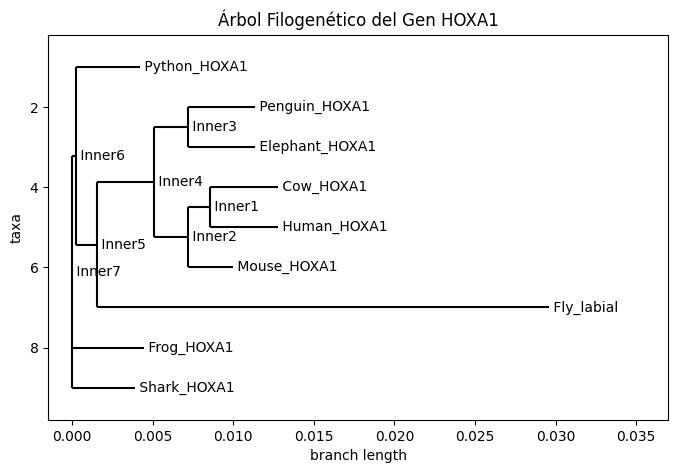

In [29]:
from Bio import AlignIO, Phylo
from Bio.Align import MultipleSeqAlignment
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
import matplotlib.pyplot as plt

# Leer archivo FASTA
alignment = AlignIO.read("hoxa1_multi.fasta", "fasta")

# Calcular matriz de distancias
calculator = DistanceCalculator("identity")
dm = calculator.get_distance(alignment)

# Construir árbol con método Neighbor Joining
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

# Dibujar árbol como imagen
fig = plt.figure(figsize=(8, 5))
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, do_show=False, axes=axes)
plt.title("Árbol Filogenético del Gen HOXA1")
plt.show()

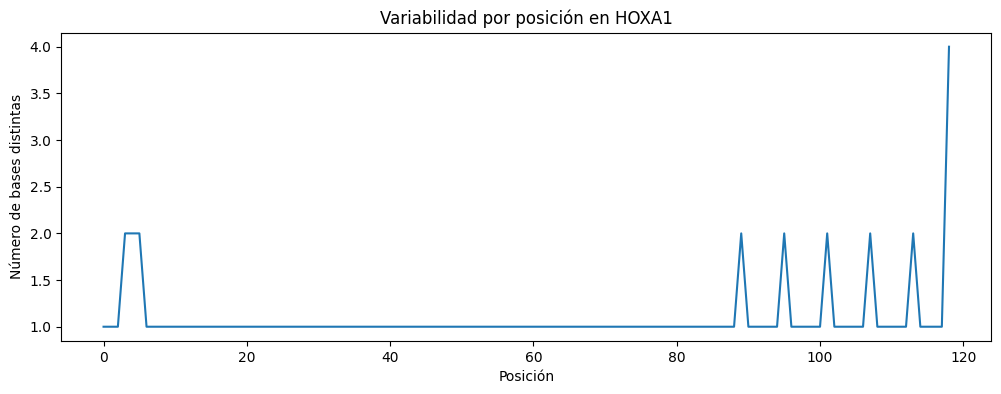

In [13]:
# Calcular variabilidad por posición
variabilidad = []
for i in range(alignment.get_alignment_length()):
    columna = alignment[:, i]
    unique_bases = set(columna)
    variabilidad.append(len(unique_bases))

# Mostrar posiciones más variables
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(variabilidad)
plt.title("Variabilidad por posición en HOXA1")
plt.xlabel("Posición")
plt.ylabel("Número de bases distintas")
plt.show()